<a href="https://colab.research.google.com/github/ole-ksandra/IAD/blob/main/%D0%9F%D0%A03_%D0%A4%D0%91_%D0%B751%D0%BC%D0%BF_Oleksandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Згенеруйте набір синтетичних даних у вигляді суміші двох гаусіан


Розділіть суміш за допомогою EM алгоритму (sklearn.mixture.GaussianMixture), зверніть увагу на параметр covariance_type. За допомогою атрибутів weights_ і covariances_ відновіть їхні значення, порівняйте з оригінальними. Візуалізуйте результат.
Приклад:
https://github.com/natsakh/IAD/blob/main/Pr_3/3_3_EM_Clustering.ipynb


# Імпорти та генерація синтетичних даних

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

np.random.seed(42)  # для відтворюваності

In [ ]:
# Кількість точок у вибірці
n_samples = 500

# Істинні параметри суміші двох 2D-гаусіан
pi_true = np.array([0.4, 0.6])  # ваги компонент (сума = 1)

mean1_true = np.array([0, 0])
cov1_true  = np.array([[1.0, 0.3],
                       [0.3, 0.5]])

mean2_true = np.array([4, 4])
cov2_true  = np.array([[1.0, -0.2],
                       [-0.2, 1.0]])

# Скільки точок з кожної компоненти
n1 = int(n_samples * pi_true[0])
n2 = n_samples - n1

# Генерування точок
X1 = np.random.multivariate_normal(mean1_true, cov1_true, n1)
X2 = np.random.multivariate_normal(mean2_true, cov2_true, n2)

X = np.vstack([X1, X2])
y_true = np.array([0]*n1 + [1]*n2)  # істинні мітки (для контролю)


Візуалізуємо вихідну суміш із істинними мітками:

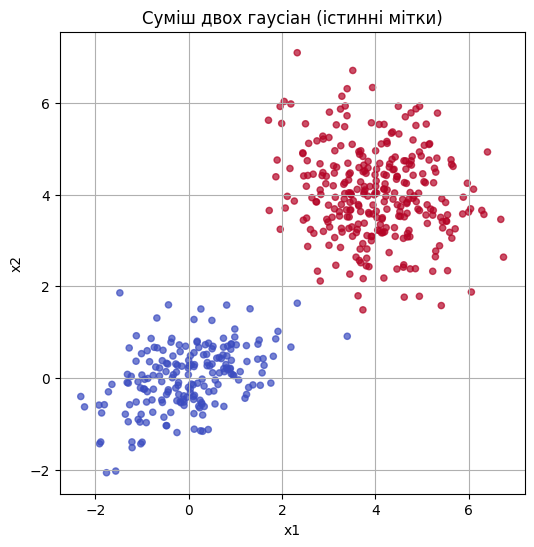

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='coolwarm', s=20, alpha=0.7)
plt.title("Суміш двох гаусіан (істинні мітки)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


# EM-алгоритм: GaussianMixture (covariance_type='full')

full (найвищий log-likelihood, −3.27)

In [ ]:
for cov_type in ['full', 'tied', 'diag', 'spherical']:
    gmm_tmp = GaussianMixture(
        n_components=2,
        covariance_type=cov_type,
        random_state=42,
        n_init=10
    )
    gmm_tmp.fit(X)
    print(cov_type, "log-likelihood =", gmm_tmp.score(X))


full log-likelihood = -3.272486855344625
tied log-likelihood = -3.3500494547534228
diag log-likelihood = -3.3164807308703272
spherical log-likelihood = -3.332961541252982


'full'  задаємо тип коваріації

In [ ]:
gmm = GaussianMixture(
    n_components=2,
    covariance_type='full',  # 'full': кластери еліптичні та з нахилами
    #типи коваріації: full — повна матриця (найгнучкіше), tied — однакові для всіх, diag — тільки діагоналі, spherical — кожен кластер має форму кулі

    random_state=42,
    n_init=10
)

gmm.fit(X)

y_pred = gmm.predict(X)  # кластерні мітки, знайдені EM


# Порівняння істинних та відновлених параметрів

In [ ]:
# Істинні параметри в зручному вигляді
means_true = np.vstack([mean1_true, mean2_true])
covs_true  = np.stack([cov1_true, cov2_true])

# Переупорядковуємо знайдені компоненти за x-координатою середнього
idx = np.argsort(gmm.means_[:, 0])

weights_est = gmm.weights_[idx]
means_est   = gmm.means_[idx]
covs_est    = gmm.covariances_[idx]

print("Істинні ваги:", pi_true)
print("Оцінені ваги:", np.round(weights_est, 3))

print("\nІстинні середні:")
print(means_true)
print("\nОцінені середні:")
print(np.round(means_est, 3))

print("\nІстинні ковараційні матриці:")
for i, c in enumerate(covs_true):
    print(f"Компонента {i}:\n{c}\n")

print("Оцінені ковараційні матриці:")
for i, c in enumerate(covs_est):
    print(f"Компонента {i}:\n{np.round(c, 3)}\n")


Істинні ваги: [0.4 0.6]
Оцінені ваги: [0.398 0.602]

Істинні середні:
[[0 0]
 [4 4]]

Оцінені середні:
[[-0.032  0.013]
 [ 4.016  4.012]]

Істинні ковараційні матриці:
Компонента 0:
[[1.  0.3]
 [0.3 0.5]]

Компонента 1:
[[ 1.  -0.2]
 [-0.2  1. ]]

Оцінені ковараційні матриці:
Компонента 0:
[[0.854 0.268]
 [0.268 0.47 ]]

Компонента 1:
[[ 1.    -0.151]
 [-0.151  0.978]]



# Візуалізація результатів кластеризації

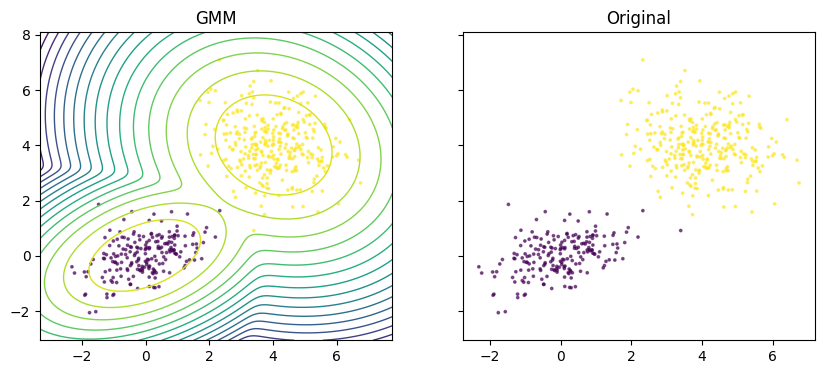

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# --- навчання GMM ---
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)     # передбачені кластери

# --- сітка для контурів ---
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]

# log-щільність для кожної точки сітки
zz = gmm.score_samples(grid)
zz = zz.reshape(xx.shape)

# --- візуалізація ---
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

ax1.set_title('GMM')
ax1.scatter(X[:, 0], X[:, 1], c=labels, s=3, alpha=0.6)
ax1.contour(xx, yy, zz, levels=15, linewidths=1)

ax2.set_title("Original")
# якщо ти зберігала істинні мітки як y_true:
ax2.scatter(X[:, 0], X[:, 1], c=y_true, s=3, alpha=0.6)

plt.show()
